In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("clean_data_new.csv")

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      2118 non-null   object 
 1   Cihaz Ağırlığı             2118 non-null   float64
 2   Dokunmatik Ekran           2118 non-null   int64  
 3   Ekran Boyutu               2118 non-null   float64
 4   Ekran Kartı Bellek Tipi    2118 non-null   object 
 5   Ekran Kartı Hafızası       2118 non-null   float64
 6   Garanti Süresi             2118 non-null   float64
 7   Garanti Tipi               2118 non-null   object 
 8   Kullanım Amacı             2118 non-null   object 
 9   Price                      2118 non-null   float64
 10  Ram (Sistem Belleği)       2118 non-null   int64  
 11  Ram (Sistem Belleği) Tipi  2118 non-null   int64  
 12  SSD Kapasitesi             2118 non-null   float64
 13  Star                       2118 non-null   float

In [5]:
df.drop("Star",axis=1,inplace=True)

<Font color="blue"> "Star" sütunu Trendyol sitesinde kullanıcıların bilgisayarlara verdiği yıldız sayısını temsil ediyor. Ancak laptop fiyatları üzerinde her zaman bir ilişkisi olmadığını düşünerek o sütunu da veri setimizden kaldırdım. (Çünkü yıldız daha çok memnuniyeti temsil ediyor. Müşteriler yüksek fiyatlı bir bilgisayara memnun kaldıkları için çok yıldız ya da düşük fiyatlı bilgisayara memnuniyetsizlikten dolayı düşük yıldız vermiş olabilirler.) 

### <Font color="blue"> Sadece sayısal verileri içeren sütunlarla basit bir regresyon denemesi yapıyorum.

In [6]:
from sklearn.model_selection import train_test_split

# X ve Y değişkenlerimizi oluşturma
X = df.loc[:,['Cihaz Ağırlığı',"Dokunmatik Ekran",'Ekran Boyutu', 'Ekran Kartı Hafızası',"Garanti Süresi",
                  "SSD Kapasitesi","Çözünürlük","Çözünürlük Standartı","Ram (Sistem Belleği)","Ram (Sistem Belleği) Tipi",
                  "İşlemci Nesli","İşlemci Çekirdek Sayısı"]]
y = df.Price

# Train/Test Ayrımı
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [7]:
print('X Train:', x_train.shape)
print('X Validation:', x_val.shape)
print('X test:', x_test.shape)

X Train: (1270, 12)
X Validation: (424, 12)
X test: (424, 12)


In [8]:
# Modeli Oluşturma
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_val)

# MSE Hesabı
mse = np.mean((pred - y_val)**2)
print("MSE: ", mse)

# R2 Skor
print("R2 Score: ", lreg.score(x_val, y_val))

MSE:  96766254.1991615
R2 Score:  0.7840422146689204


In [9]:
# Modelimizde yer alan katsayı değerleri
lreg.coef_

array([ 1.42423277e+02,  1.10092652e+04,  8.84305178e+02,  3.79309467e+03,
        1.94181650e+04,  3.78158721e+00,  6.86183778e+03, -3.70868229e+02,
        1.80941897e+02, -4.14254970e+02,  9.20529460e+02,  1.02345777e+03])

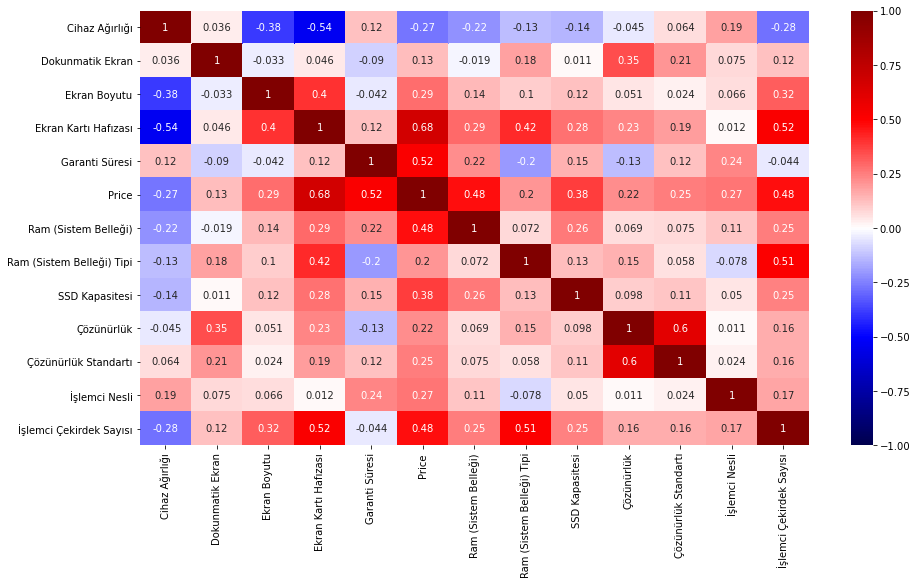

In [10]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

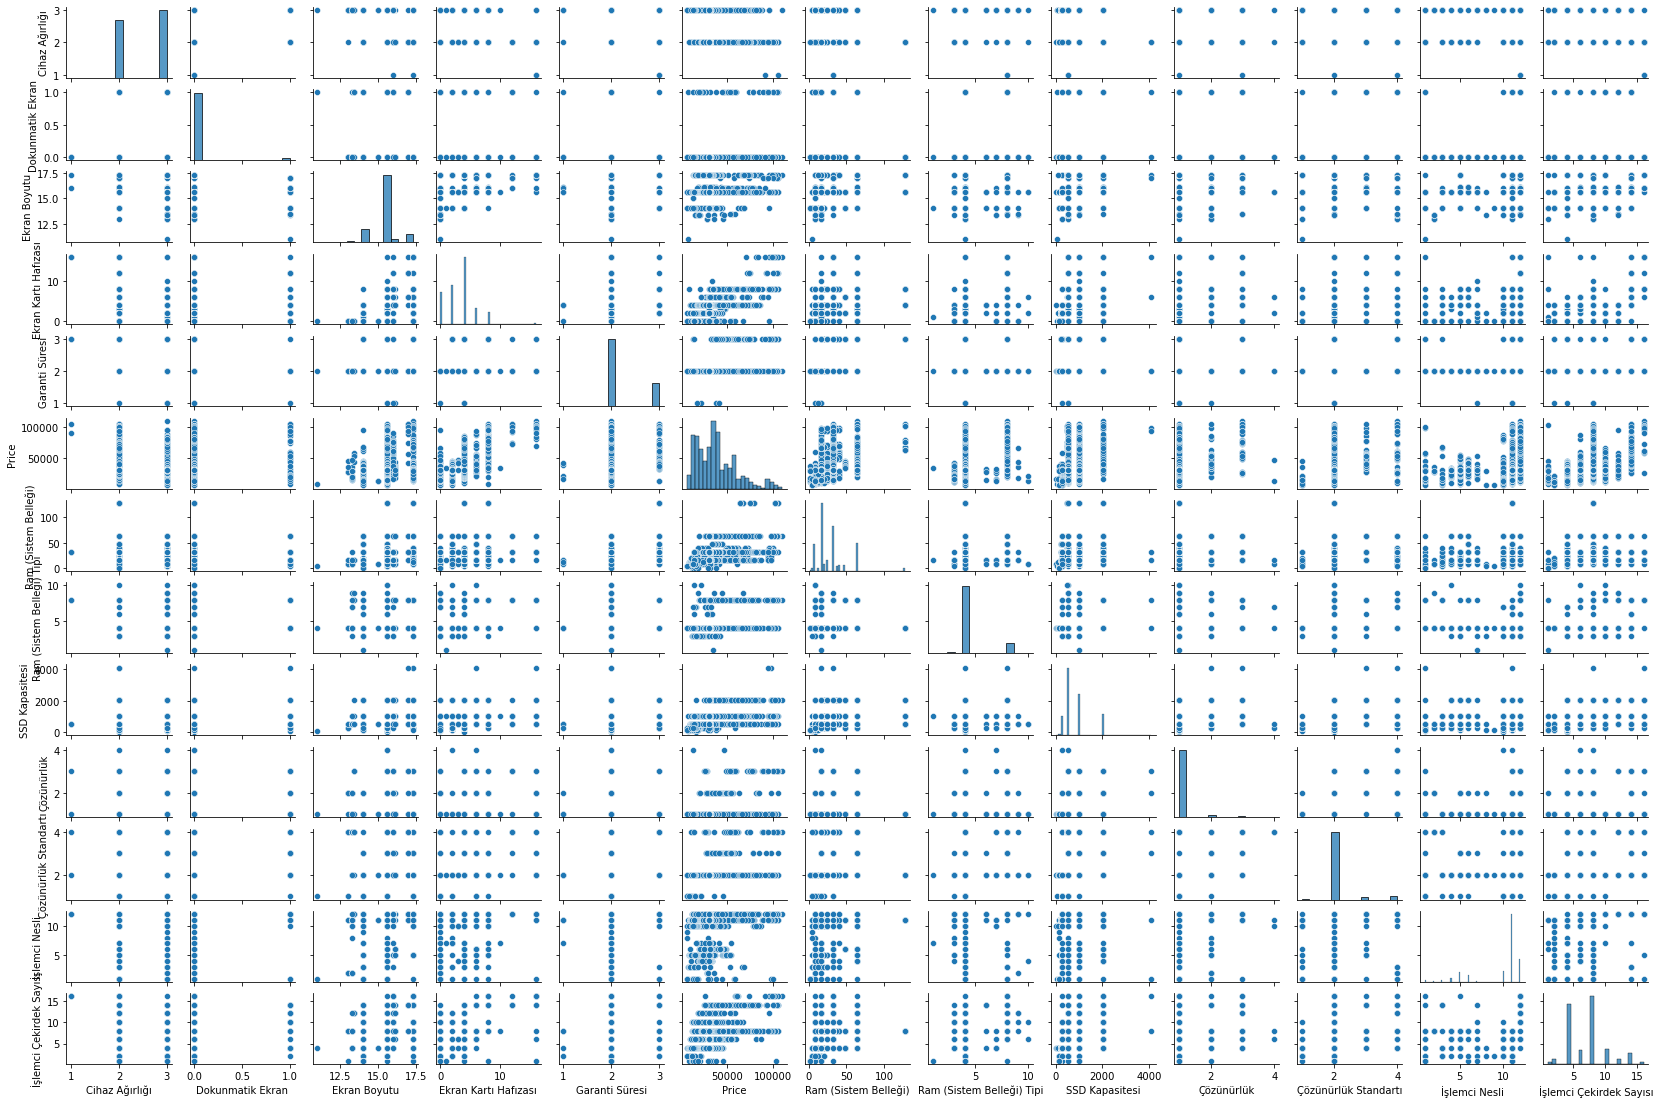

In [12]:
sns.pairplot(df, height=1.2, aspect=1.5);

In [13]:
# Modeli Oluşturma
model = sm.OLS(y_train, x_train)

# Modeli Eğitme
fit = model.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              1628.
Date:                Wed, 23 Nov 2022   Prob (F-statistic):                        0.00
Time:                        23:09:33   Log-Likelihood:                         -13586.
No. Observations:                1270   AIC:                                  2.720e+04
Df Residuals:                    1258   BIC:                                  2.726e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Cihaz Ağırlığı            -1941.9097    769.986     -2.522      0.012   -3452.509    -431.311
Dokunmatik Ekran           1.198e+04   2142.521      5.590      0.000    7773.011    1.62e+04
Ekran Boyutu              -2391.0289    162.275    -14.734      0.000   -2709.388   -2072.670
Ekran Kartı Hafızası       4099.9054    176.409     23.241      0.000    3753.817    4445.994
Garanti Süresi             1.759e+04    789.305     22.287      0.000     1.6e+04    1.91e+04
SSD Kapasitesi                3.8647      0.568      6.800      0.000       2.750       4.980
Çözünürlük                 5510.0526   1155.645      4.768      0.000    3242.848    7777.257
Çözünürlük Standartı       -704.2493    805.187     -0.875      0.382   -2283.907     875.408
Ram (Sistem Belleği)        177.5984     15.943     11.140      0.000     146.321     208.876
Ram (Sistem Belleği) Tipi  -987.3200    281.809     -3.504      0.000   -1540.188    -434.452
İşlemci Nesli               960.3917    126.062      7.618      0.000     713.076    1207.707
İşlemci Çekirdek Sayısı    1150.1883    132.201      8.700      0.000     890.829    1409.547
==============================================================================
Omnibus:                      213.658   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.270
Skew:                           1.021   Prob(JB):                     5.42e-87
Kurtosis:                       4.826   Cond. No.                     7.32e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Font color="blue"> Price sütununun dağılımına bakalım.

<AxesSubplot:xlabel='Price', ylabel='Count'>

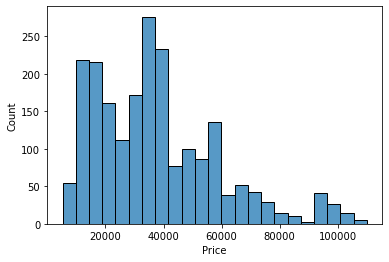

In [14]:
sns.histplot(df.Price)

In [23]:
df["Price_Log"] = np.log(df.Price)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      2118 non-null   object 
 1   Cihaz Ağırlığı             2118 non-null   float64
 2   Dokunmatik Ekran           2118 non-null   int64  
 3   Ekran Boyutu               2118 non-null   float64
 4   Ekran Kartı Bellek Tipi    2118 non-null   object 
 5   Ekran Kartı Hafızası       2118 non-null   float64
 6   Garanti Süresi             2118 non-null   float64
 7   Garanti Tipi               2118 non-null   object 
 8   Kullanım Amacı             2118 non-null   object 
 9   Price                      2118 non-null   float64
 10  Ram (Sistem Belleği)       2118 non-null   int64  
 11  Ram (Sistem Belleği) Tipi  2118 non-null   int64  
 12  SSD Kapasitesi             2118 non-null   float64
 13  Çözünürlük                 2118 non-null   float

<font color ="blue" > Target kolonumuzu fiyatın logaritması, featurelarımız da ilk regresyon denemesinde kullandığım gibi yine sayısal sütunlar olacak şekilde bir basit regresyon denemesi daha yapıp sonuçlarını kontrol ediyorum.

In [25]:
# X ve Y değişkenlerimizi oluşturma
X2 = df.loc[:,['Cihaz Ağırlığı',"Dokunmatik Ekran",'Ekran Boyutu', 'Ekran Kartı Hafızası',"Garanti Süresi",
                  "SSD Kapasitesi","Çözünürlük","Çözünürlük Standartı","Ram (Sistem Belleği)","Ram (Sistem Belleği) Tipi",
                  "İşlemci Nesli","İşlemci Çekirdek Sayısı"]]
y2 = df.Price_Log

# Train/Test Ayrımı
X2_train, x2_test, Y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x2_train, x2_val, y2_train, y2_val = train_test_split(X2_train, Y2_train, test_size=0.25, random_state=42)

In [26]:
# Modeli Oluşturma
lreg2 = LinearRegression()

lreg2.fit(x2_train,y2_train)

pred2 = lreg2.predict(x2_val)

# MSE Hesabı
mse2 = np.mean((pred2 - y2_val)**2)
print("MSE: ", mse2)

# R2 Skor
print("R2 Score: ", lreg2.score(x2_val, y2_val))

MSE:  0.07815407712107979
R2 Score:  0.7887084180509913


In [27]:
# Modeli Oluşturma
model2 = sm.OLS(y2_train, x2_train)

# Modeli Eğitme
fit2 = model2.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          6.034e+04
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                        0.00
Time:                        01:06:55   Log-Likelihood:                         -737.31
No. Observations:                1270   AIC:                                      1499.
Df Residuals:                    1258   BIC:                                      1560.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Cihaz Ağırlığı                0.2101      0.031      6.757      0.000       0.149       0.271
Dokunmatik Ekran              0.0084      0.087      0.097      0.923      -0.161       0.178
Ekran Boyutu                  0.4121      0.007     62.898      0.000       0.399       0.425
Ekran Kartı Hafızası          0.0449      0.007      6.304      0.000       0.031       0.059
Garanti Süresi                0.7529      0.032     23.625      0.000       0.690       0.815
SSD Kapasitesi                0.0001   2.29e-05      6.374      0.000       0.000       0.000
Çözünürlük                    0.3035      0.047      6.506      0.000       0.212       0.395
Çözünürlük Standartı          0.0837      0.033      2.573      0.010       0.020       0.147
Ram (Sistem Belleği)          0.0061      0.001      9.506      0.000       0.005       0.007
Ram (Sistem Belleği) Tipi     0.0815      0.011      7.165      0.000       0.059       0.104
İşlemci Nesli                 0.0280      0.005      5.493      0.000       0.018       0.038
İşlemci Çekirdek Sayısı       0.0190      0.005      3.554      0.000       0.008       0.029
==============================================================================
Omnibus:                       19.798   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.078
Skew:                           0.233   Prob(JB):                     9.74e-06
Kurtosis:                       3.468   Cond. No.                     7.32e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color="blue"> Validation setimizdeki R score değerlerimizde herhangi bir değişiklik olmadı. Train setimizin istatiski çıktılarında bazı değişikliklerin olduğunu görüyoruz. Dokunmatik ekranın p-value değeri oldukça yüksek, bu aslında bize bilgisayarın fiyatına etkisinin az olduğunu gösteriyor ancak bilgisayarda ekranın dokunmatik olup olmaması fiyatı etkiler diye düşündüğüm için şimdilik kaldırmıyorum. Verisetimizin bir de heatmapini kontrol edelim.

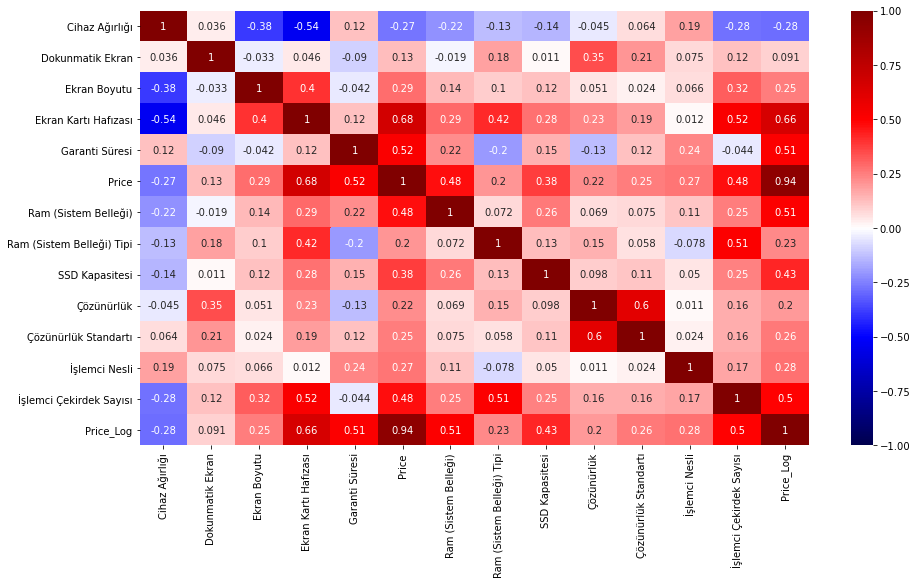

In [28]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

<font color="blue" > Sütunlar arasında multicollinearity olduğunu düşündürecek kadar yüksek korelasyon değerleri olmadığı için şimdilik fiyatla korelasyonu en yüksek olan sütunları seçerek bir de onlarla lineer regresyon deniyorum.

In [34]:
# X ve Y değişkenlerimizi oluşturma
X3 = df.loc[:,['Ekran Kartı Hafızası',"Garanti Süresi",
                  "SSD Kapasitesi","Ram (Sistem Belleği)",
                  "İşlemci Çekirdek Sayısı"]]
y3 = df.Price_Log

# Train/Test Ayrımı
X3_train, x3_test, Y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x3_train, x3_val, y3_train, y3_val = train_test_split(X3_train, Y3_train, test_size=0.25, random_state=42)

In [35]:
# Modeli Oluşturma
lreg3 = LinearRegression()

lreg3.fit(x3_train,y3_train)

pred3 = lreg3.predict(x3_val)

# MSE Hesabı
mse3 = np.mean((pred3 - y3_val)**2)
print("MSE: ", mse3)

# R2 Skor
print("R2 Score: ", lreg3.score(x3_val, y3_val))

MSE:  0.08553815020480787
R2 Score:  0.7687453842521159


In [36]:
# Modeli Oluşturma
model3 = sm.OLS(y3_train, x3_train)

# Modeli Eğitme
fit3 = model3.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          1.289e+04
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                        0.00
Time:                        01:20:21   Log-Likelihood:                         -2265.7
No. Observations:                1270   AIC:                                      4541.
Df Residuals:                    1265   BIC:                                      4567.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Ekran Kartı Hafızası        0.0135      0.019      0.722      0.471      -0.023       0.050
Garanti Süresi              3.5042      0.045     77.738      0.000       3.416       3.593
SSD Kapasitesi              0.0002    7.6e-05      2.943      0.003    7.46e-05       0.000
Ram (Sistem Belleği)       -0.0011      0.002     -0.536      0.592      -0.005       0.003
İşlemci Çekirdek Sayısı     0.2840      0.014     19.885      0.000       0.256       0.312
==============================================================================
Omnibus:                      102.828   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.777
Skew:                          -0.459   Prob(JB):                     7.05e-16
Kurtosis:                       2.310   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color = "blue" > Bu üçüncü lineer regresyon modeli ile R score %78'den %76'ya düşmüş olsa da adjusted r score ve conditional number değerlerinde modelde overfit olma durumunu düşündüren değerleri az da olsa azaltmış olduk.

<font color="blue"> Şimdi bir de önemli olduğunu düşündüğüm object sütunlara dummy variable atayarak deneme yapacağım.

In [38]:
new_df = pd.get_dummies(df, columns=["Brand","Ekran Kartı Bellek Tipi","Kullanım Amacı","İşlemci Tipi"], drop_first=True)
new_df

,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı Hafızası,Garanti Süresi,Garanti Tipi,Price,Ram (Sistem Belleği),Ram (Sistem Belleği) Tipi,SSD Kapasitesi,...,Kullanım Amacı_Tasarım,İşlemci Tipi_AMD Ryzen 3,İşlemci Tipi_AMD Ryzen 5,İşlemci Tipi_AMD Ryzen 7,İşlemci Tipi_Intel Celeron,İşlemci Tipi_Intel Core i3,İşlemci Tipi_Intel Core i5,İşlemci Tipi_Intel Core i7,İşlemci Tipi_Intel Core i9,İşlemci Tipi_M2
0,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,20759.0,16,4,256.0,...,0,0,1,0,0,0,0,0,0,0
1,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,15599.0,8,4,512.0,...,0,0,1,0,0,0,0,0,0,0
2,2.0,0,15.6,4.0,2.0,Marka Grantili,17950.0,16,4,512.0,...,0,0,0,0,0,0,1,0,0,0
3,3.0,0,15.6,0.0,2.0,Marka Grantili,12028.0,8,4,256.0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,22499.0,16,4,1024.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,64,4,512.0,...,0,0,0,0,0,0,1,0,0,0
2114,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,32,4,512.0,...,0,0,0,0,0,0,1,0,0,0
2115,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,16,4,1024.0,...,0,0,0,0,0,0,1,0,0,0
2116,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,16,4,512.0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cihaz Ağırlığı                 2118 non-null   float64
 1   Dokunmatik Ekran               2118 non-null   int64  
 2   Ekran Boyutu                   2118 non-null   float64
 3   Ekran Kartı Hafızası           2118 non-null   float64
 4   Garanti Süresi                 2118 non-null   float64
 5   Garanti Tipi                   2118 non-null   object 
 6   Price                          2118 non-null   float64
 7   Ram (Sistem Belleği)           2118 non-null   int64  
 8   Ram (Sistem Belleği) Tipi      2118 non-null   int64  
 9   SSD Kapasitesi                 2118 non-null   float64
 10  Çözünürlük                     2118 non-null   float64
 11  Çözünürlük Standartı           2118 non-null   float64
 12  İşlemci Nesli                  2118 non-null   f

In [43]:
# X ve Y değişkenlerimizi oluşturma
X4 = new_df.drop(["Cihaz Ağırlığı","Dokunmatik Ekran","Ekran Boyutu","Garanti Tipi","Price","Ram (Sistem Belleği) Tipi",
              "Çözünürlük","Çözünürlük Standartı","İşlemci Nesli","İşletim Sistemi","Price_Log"],axis=1)
y4 = new_df.Price_Log

# Train/Test Ayrımı
X4_train, x4_test, Y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x4_train, x4_val, y4_train, y4_val = train_test_split(X4_train, Y4_train, test_size=0.25, random_state=42)

In [44]:
# Modeli Oluşturma
lreg4 = LinearRegression()

lreg4.fit(x4_train,y4_train)

pred4 = lreg4.predict(x4_val)

# MSE Hesabı
mse4 = np.mean((pred4 - y4_val)**2)
print("MSE: ", mse4)

# R2 Skor
print("R2 Score: ", lreg4.score(x4_val, y4_val))

MSE:  0.036896940723858074
R2 Score:  0.9002481602777442


In [45]:
# Modeli Oluşturma
model4 = sm.OLS(y4_train, x4_train)

# Modeli Eğitme
fit4 = model4.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_Log   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.270e+04
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                        0.00
Time:                        01:32:45   Log-Likelihood:                         -1203.1
No. Observations:                1270   AIC:                                      2460.
Df Residuals:                    1243   BIC:                                      2599.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Ekran Kartı Hafızası              0.0524      0.013      3.892      0.000       0.026       0.079
Garanti Süresi                    0.9765      0.052     18.796      0.000       0.875       1.078
Ram (Sistem Belleği)              0.0033      0.001      3.431      0.001       0.001       0.005
SSD Kapasitesi                    0.0001   3.42e-05      3.108      0.002    3.91e-05       0.000
İşlemci Çekirdek Sayısı           0.0491      0.009      5.611      0.000       0.032       0.066
Brand_ASUS                        1.2827      0.102     12.553      0.000       1.082       1.483
Brand_Apple                       1.6517      0.645      2.560      0.011       0.386       2.918
Brand_Dell                        1.6273      0.108     15.003      0.000       1.414       1.840
Brand_HP                          1.3900      0.107     12.952      0.000       1.179       1.601
Brand_LENOVO                      1.3050      0.104     12.521      0.000       1.101       1.509
Brand_MSI                         1.4148      0.153      9.241      0.000       1.114       1.715
Ekran Kartı Bellek Tipi_DDR4      0.8638      0.148      5.840      0.000       0.574       1.154
Ekran Kartı Bellek Tipi_GDDR5     0.5724      0.149      3.833      0.000       0.279       0.865
Ekran Kartı Bellek Tipi_GDDR6     0.5087      0.153      3.326      0.001       0.209       0.809
Ekran Kartı Bellek Tipi_SD        0.4877      0.150      3.257      0.001       0.194       0.782
Kullanım Amacı_Ofis - İş          0.8763      0.090      9.789      0.000       0.701       1.052
Kullanım Amacı_Oyun               0.9813      0.096     10.208      0.000       0.793       1.170
Kullanım Amacı_Tasarım            0.6851      0.276      2.484      0.013       0.144       1.226
İşlemci Tipi_AMD Ryzen 3          4.1285      0.253     16.310      0.000       3.632       4.625
İşlemci Tipi_AMD Ryzen 5          4.8534      0.191     25.442      0.000       4.479       5.228
İşlemci Tipi_AMD Ryzen 7          4.9147      0.186     26.435      0.000       4.550       5.279
İşlemci Tipi_Intel Celeron        3.9864      0.283     14.074      0.000       3.431       4.542
İşlemci Tipi_Intel Core i3        4.5563      0.206     22.145      0.000       4.153       4.960
İşlemci Tipi_Intel Core i5        4.6277      0.177     26.145      0.000       4.280       4.975
İşlemci Tipi_Intel Core i7        4.7519      0.185     25.634      0.000       4.388       5.116
İşlemci Tipi_Intel Core i9        4.9167      0.213     23.095      0.000       4.499       5.334
İşlemci Tipi_M2                   4.4426      0.730      6.084      0.000       3.010       5.875
============================================

<font color="blue"> R score değerimiz %90'a yükseldi ancak modelimizde overfit olma durumu çok yüksek. Çünkü adjusted r squared ve conditional number değerleimiz çok yüksek. Modelin bağımsız değişkenlerinde mantıklı azaltmalar yapabilmek için p-value değerlerini kontrol ettiğimde özellikten vazgeçmemi gerektirecek büyüklükte bir p-value değeri olmadığını düşünüyorum. Ve katsayılara bakarak bir de regularisation uygulayarak deneme yapacağım.

In [47]:
from sklearn.preprocessing import StandardScaler

In [52]:
std_scale = StandardScaler()
new_df_ss = std_scale.fit_transform(new_df.drop(["Cihaz Ağırlığı","Dokunmatik Ekran","Ekran Boyutu","Garanti Tipi","Price","Ram (Sistem Belleği) Tipi",
              "Çözünürlük","Çözünürlük Standartı","İşlemci Nesli","İşletim Sistemi","Price_Log"],axis=1).values)

In [54]:
new_df_ss=pd.DataFrame(new_df_ss,columns=new_df.drop(["Cihaz Ağırlığı","Dokunmatik Ekran","Ekran Boyutu","Garanti Tipi","Price","Ram (Sistem Belleği) Tipi",
              "Çözünürlük","Çözünürlük Standartı","İşlemci Nesli","İşletim Sistemi","Price_Log"],axis=1).columns)

In [55]:
new_df_ss

,Ekran Kartı Hafızası,Garanti Süresi,Ram (Sistem Belleği),SSD Kapasitesi,İşlemci Çekirdek Sayısı,Brand_ASUS,Brand_Apple,Brand_Dell,Brand_HP,Brand_LENOVO,...,Kullanım Amacı_Tasarım,İşlemci Tipi_AMD Ryzen 3,İşlemci Tipi_AMD Ryzen 5,İşlemci Tipi_AMD Ryzen 7,İşlemci Tipi_Intel Celeron,İşlemci Tipi_Intel Core i3,İşlemci Tipi_Intel Core i5,İşlemci Tipi_Intel Core i7,İşlemci Tipi_Intel Core i9,İşlemci Tipi_M2
0,0.251474,-0.58434,-0.596809,-1.006726,-0.320833,-0.466842,-0.061575,-0.395910,-0.39111,1.006632,...,-0.072254,-0.092582,4.640249,-0.355803,-0.068875,-0.143954,-0.457060,-1.123753,-0.269082,-0.057584
1,0.251474,-0.58434,-0.987608,-0.553494,-0.320833,-0.466842,-0.061575,-0.395910,-0.39111,-0.993412,...,-0.072254,-0.092582,4.640249,-0.355803,-0.068875,-0.143954,-0.457060,-1.123753,-0.269082,-0.057584
2,0.251474,-0.58434,-0.596809,-0.553494,-0.320833,-0.466842,-0.061575,2.525825,-0.39111,-0.993412,...,-0.072254,-0.092582,-0.215506,-0.355803,-0.068875,-0.143954,2.187895,-1.123753,-0.269082,-0.057584
3,-1.337257,-0.58434,-0.987608,-1.006726,-0.968307,2.142053,-0.061575,-0.395910,-0.39111,-0.993412,...,-0.072254,-0.092582,-0.215506,-0.355803,-0.068875,-0.143954,2.187895,-1.123753,-0.269082,-0.057584
4,0.251474,-0.58434,-0.596809,0.352971,0.326641,2.142053,-0.061575,-0.395910,-0.39111,-0.993412,...,-0.072254,-0.092582,-0.215506,2.810544,-0.068875,-0.143954,-0.457060,-1.123753,-0.269082,-0.057584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,0.251474,-0.58434,1.747989,-0.553494,-0.320833,-0.466842,-0.061575,2.525825,-0.39111,-0.993412,...,-0.072254,-0.092582,-0.215506,-0.355803,-0.068875,-0.143954,2.187895,-1.123753,-0.269082,-0.057584
2114,0.251474,-0.58434,0.184790,-0.553494,-0.320833,-0.466842,-0.061575,2.525825,-0.39111,-0.993412,...,-0.072254,-0.092582,-0.215506,-0.355803,-0.068875,-0.143954,2.187895,-1.123753,-0.269082,-0.057584
2115,0.251474,-0.58434,-0.596809,0.352971,-0.320833,-0.466842,-0.061575,2.525825,-0.39111,-0.993412,...,-0.072254,-0.092582,-0.215506,-0.355803,-0.068875,-0.143954,2.187895,-1.123753,-0.269082,-0.057584
2116,0.251474,-0.58434,-0.596809,-0.553494,-0.320833,-0.466842,-0.061575,2.525825,-0.39111,-0.993412,...,-0.072254,-0.092582,-0.215506,-0.355803,-0.068875,-0.143954,2.187895,-1.123753,-0.269082,-0.057584


In [57]:
# X ve Y değişkenlerimizi oluşturma
X5 = new_df_ss
y5 = new_df.Price_Log

# Train/Test Ayrımı
X5_train, x5_test, Y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x5_train, x5_val, y5_train, y5_val = train_test_split(X5_train, Y5_train, test_size=0.25, random_state=42)

In [58]:
# Modeli Oluşturma
lreg5 = LinearRegression()

lreg5.fit(x5_train,y5_train)

pred5 = lreg5.predict(x5_val)

# MSE Hesabı
mse5 = np.mean((pred5 - y5_val)**2)
print("MSE: ", mse5)

# R2 Skor
print("R2 Score: ", lreg5.score(x5_val, y5_val))

MSE:  0.03689694072385767
R2 Score:  0.9002481602777451


In [59]:
# Modeli Oluşturma
model5 = sm.OLS(y5_train, x5_train)

# Modeli Eğitme
fit5 = model5.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_Log   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):             -0.012
Method:                 Least Squares   F-statistic:                             0.4620
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                       0.992
Time:                        01:39:40   Log-Likelihood:                         -4767.8
No. Observations:                1270   AIC:                                      9590.
Df Residuals:                    1243   BIC:                                      9729.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Ekran Kartı Hafızası              0.0197      0.561      0.035      0.972      -1.082       1.121
Garanti Süresi                    0.2752      0.419      0.656      0.512      -0.548       1.098
Ram (Sistem Belleği)              0.0162      0.327      0.050      0.960      -0.625       0.657
SSD Kapasitesi                    0.1544      0.319      0.483      0.629      -0.472       0.781
İşlemci Çekirdek Sayısı           0.1976      0.449      0.440      0.660      -0.683       1.078
Brand_ASUS                       -0.4442      0.688     -0.646      0.519      -1.794       0.905
Brand_Apple                       0.3292      0.656      0.502      0.616      -0.957       1.616
Brand_Dell                       -0.3425      0.663     -0.517      0.605      -1.643       0.958
Brand_HP                         -0.0487      0.645     -0.076      0.940      -1.314       1.216
Brand_LENOVO                     -0.0422      0.904     -0.047      0.963      -1.816       1.732
Brand_MSI                         0.2162      0.355      0.609      0.543      -0.481       0.913
Ekran Kartı Bellek Tipi_DDR4     -0.0768      0.596     -0.129      0.898      -1.247       1.093
Ekran Kartı Bellek Tipi_GDDR5     0.3067      0.917      0.334      0.738      -1.493       2.106
Ekran Kartı Bellek Tipi_GDDR6     0.1866      1.220      0.153      0.879      -2.208       2.581
Ekran Kartı Bellek Tipi_SD        0.0967      0.806      0.120      0.905      -1.485       1.678
Kullanım Amacı_Ofis - İş         -0.5145      0.707     -0.728      0.467      -1.901       0.872
Kullanım Amacı_Oyun              -0.3214      0.732     -0.439      0.661      -1.758       1.115
Kullanım Amacı_Tasarım           -0.1420      0.329     -0.432      0.666      -0.787       0.503
İşlemci Tipi_AMD Ryzen 3          0.0276      0.438      0.063      0.950      -0.832       0.887
İşlemci Tipi_AMD Ryzen 5         -0.5158      0.820     -0.629      0.529      -2.124       1.092
İşlemci Tipi_AMD Ryzen 7          0.1316      1.222      0.108      0.914      -2.267       2.530
İşlemci Tipi_Intel Celeron        0.0608      0.360      0.169      0.866      -0.645       0.766
İşlemci Tipi_Intel Core i3       -0.2567      0.588     -0.436      0.663      -1.410       0.897
İşlemci Tipi_Intel Core i5       -0.2619      1.411     -0.186      0.853      -3.031       2.507
İşlemci Tipi_Intel Core i7       -0.1758      1.864     -0.094      0.925      -3.834       3.482
İşlemci Tipi_Intel Core i9        0.1472      1.031      0.143      0.886      -1.876       2.170
İşlemci Tipi_M2                  -0.3184      0.706     -0.451      0.652      -1.703       1.066
============================================

<font color="blue"> Bu işlem bizi gerçeklikten oldukça uzak bir yere çekti:((

In [60]:
new_df

,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı Hafızası,Garanti Süresi,Garanti Tipi,Price,Ram (Sistem Belleği),Ram (Sistem Belleği) Tipi,SSD Kapasitesi,...,Kullanım Amacı_Tasarım,İşlemci Tipi_AMD Ryzen 3,İşlemci Tipi_AMD Ryzen 5,İşlemci Tipi_AMD Ryzen 7,İşlemci Tipi_Intel Celeron,İşlemci Tipi_Intel Core i3,İşlemci Tipi_Intel Core i5,İşlemci Tipi_Intel Core i7,İşlemci Tipi_Intel Core i9,İşlemci Tipi_M2
0,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,20759.0,16,4,256.0,...,0,0,1,0,0,0,0,0,0,0
1,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,15599.0,8,4,512.0,...,0,0,1,0,0,0,0,0,0,0
2,2.0,0,15.6,4.0,2.0,Marka Grantili,17950.0,16,4,512.0,...,0,0,0,0,0,0,1,0,0,0
3,3.0,0,15.6,0.0,2.0,Marka Grantili,12028.0,8,4,256.0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,22499.0,16,4,1024.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,64,4,512.0,...,0,0,0,0,0,0,1,0,0,0
2114,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,32,4,512.0,...,0,0,0,0,0,0,1,0,0,0
2115,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,16,4,1024.0,...,0,0,0,0,0,0,1,0,0,0
2116,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,16,4,512.0,...,0,0,0,0,0,0,1,0,0,0


<font color ="blue"> Şimdi bir de ilk baştaki df veristimizde ilişkili olduğunu düşündüğüm özellikler arasında bi rilişki kurarak deneyeceğim.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      2118 non-null   object 
 1   Cihaz Ağırlığı             2118 non-null   float64
 2   Dokunmatik Ekran           2118 non-null   int64  
 3   Ekran Boyutu               2118 non-null   float64
 4   Ekran Kartı Bellek Tipi    2118 non-null   object 
 5   Ekran Kartı Hafızası       2118 non-null   float64
 6   Garanti Süresi             2118 non-null   float64
 7   Garanti Tipi               2118 non-null   object 
 8   Kullanım Amacı             2118 non-null   object 
 9   Price                      2118 non-null   float64
 10  Ram (Sistem Belleği)       2118 non-null   int64  
 11  Ram (Sistem Belleği) Tipi  2118 non-null   int64  
 12  SSD Kapasitesi             2118 non-null   float64
 13  Çözünürlük                 2118 non-null   float

In [62]:
ilisik_df = df.copy()

In [63]:
ilisik_df["İşlemci"] = ilisik_df["İşlemci Nesli"]*ilisik_df["İşlemci Çekirdek Sayısı"]
ilisik_df["Çözünürlük Çarpım"] = ilisik_df["Çözünürlük"]*ilisik_df["Çözünürlük Standartı"]
ilisik_df["Ram"] = ilisik_df["Ram (Sistem Belleği)"]*ilisik_df["Ram (Sistem Belleği) Tipi"]
ilisik_df.drop(["Ram (Sistem Belleği)","Ram (Sistem Belleği) Tipi","İşlemci Nesli","İşlemci Çekirdek Sayısı","Çözünürlük","Çözünürlük Standartı"],axis=1,inplace=True)

In [64]:
ilisik_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    2118 non-null   object 
 1   Cihaz Ağırlığı           2118 non-null   float64
 2   Dokunmatik Ekran         2118 non-null   int64  
 3   Ekran Boyutu             2118 non-null   float64
 4   Ekran Kartı Bellek Tipi  2118 non-null   object 
 5   Ekran Kartı Hafızası     2118 non-null   float64
 6   Garanti Süresi           2118 non-null   float64
 7   Garanti Tipi             2118 non-null   object 
 8   Kullanım Amacı           2118 non-null   object 
 9   Price                    2118 non-null   float64
 10  SSD Kapasitesi           2118 non-null   float64
 11  İşlemci Tipi             2118 non-null   object 
 12  İşletim Sistemi          2118 non-null   object 
 13  Price_Log                2118 non-null   float64
 14  İşlemci                 

<font color="blue"> Yeni oluşturduğum ilişik_df veri setinin sayısal sütunları ile bir regresyon denemesi daha yapıyorum.

In [65]:
# X ve Y değişkenlerimizi oluşturma
X6 = ilisik_df.drop(["Brand","Ekran Kartı Bellek Tipi","Garanti Tipi","Kullanım Amacı","Price","Price_Log","İşlemci Tipi",
                     "İşletim Sistemi"],axis=1)
y6 = ilisik_df.Price_Log

# Train/Test Ayrımı
X6_train, x6_test, Y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x6_train, x6_val, y6_train, y6_val = train_test_split(X6_train, Y6_train, test_size=0.25, random_state=42)

In [66]:
# Modeli Oluşturma
lreg6 = LinearRegression()

lreg6.fit(x6_train,y6_train)

pred6 = lreg6.predict(x6_val)

# MSE Hesabı
mse6 = np.mean((pred6 - y6_val)**2)
print("MSE: ", mse6)

# R2 Skor
print("R2 Score: ", lreg6.score(x6_val, y6_val))

MSE:  0.08248828816131898
R2 Score:  0.7769907656785596


In [67]:
# Modeli Oluşturma
model6 = sm.OLS(y6_train, x6_train)

# Modeli Eğitme
fit6 = model6.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_Log   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          7.189e+04
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                        0.00
Time:                        01:51:00   Log-Likelihood:                         -810.20
No. Observations:                1270   AIC:                                      1638.
Df Residuals:                    1261   BIC:                                      1685.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Cihaz Ağırlığı           0.2917      0.030      9.722      0.000       0.233       0.351
Dokunmatik Ekran         0.2119      0.090      2.365      0.018       0.036       0.388
Ekran Boyutu             0.4581      0.006     77.022      0.000       0.446       0.470
Ekran Kartı Hafızası     0.0625      0.007      8.852      0.000       0.049       0.076
Garanti Süresi           0.7619      0.030     25.225      0.000       0.703       0.821
SSD Kapasitesi           0.0002   2.41e-05      6.908      0.000       0.000       0.000
İşlemci                  0.0019      0.000      5.268      0.000       0.001       0.003
Çözünürlük Çarpım        0.0550      0.010      5.669      0.000       0.036       0.074
Ram                      0.0013      0.000      9.010      0.000       0.001       0.002
==============================================================================
Omnibus:                       28.184   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.144
Skew:                           0.286   Prob(JB):                     3.85e-08
Kurtosis:                       3.565   Cond. No.                     7.09e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color="blue"> Şimdi de dummy variable  atayarak deneme yapacağım.

In [68]:
ilisik_df = pd.get_dummies(ilisik_df, columns=["Brand","Ekran Kartı Bellek Tipi","Kullanım Amacı","İşlemci Tipi"], drop_first=True)
ilisik_df

,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı Hafızası,Garanti Süresi,Garanti Tipi,Price,SSD Kapasitesi,İşletim Sistemi,Price_Log,...,Kullanım Amacı_Tasarım,İşlemci Tipi_AMD Ryzen 3,İşlemci Tipi_AMD Ryzen 5,İşlemci Tipi_AMD Ryzen 7,İşlemci Tipi_Intel Celeron,İşlemci Tipi_Intel Core i3,İşlemci Tipi_Intel Core i5,İşlemci Tipi_Intel Core i7,İşlemci Tipi_Intel Core i9,İşlemci Tipi_M2
0,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,20759.0,256.0,Free Dos,9.940735,...,0,0,1,0,0,0,0,0,0,0
1,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,15599.0,512.0,Free Dos,9.654962,...,0,0,1,0,0,0,0,0,0,0
2,2.0,0,15.6,4.0,2.0,Marka Grantili,17950.0,512.0,Free Dos,9.795345,...,0,0,0,0,0,0,1,0,0,0
3,3.0,0,15.6,0.0,2.0,Marka Grantili,12028.0,256.0,Windows,9.394993,...,0,0,0,0,0,0,1,0,0,0
4,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,22499.0,1024.0,Free Dos,10.021226,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,512.0,Windows,10.308919,...,0,0,0,0,0,0,1,0,0,0
2114,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,512.0,Free Dos,10.308919,...,0,0,0,0,0,0,1,0,0,0
2115,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,1024.0,Free Dos,10.308919,...,0,0,0,0,0,0,1,0,0,0
2116,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,512.0,Free Dos,10.308919,...,0,0,0,0,0,0,1,0,0,0


In [69]:
ilisik_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cihaz Ağırlığı                 2118 non-null   float64
 1   Dokunmatik Ekran               2118 non-null   int64  
 2   Ekran Boyutu                   2118 non-null   float64
 3   Ekran Kartı Hafızası           2118 non-null   float64
 4   Garanti Süresi                 2118 non-null   float64
 5   Garanti Tipi                   2118 non-null   object 
 6   Price                          2118 non-null   float64
 7   SSD Kapasitesi                 2118 non-null   float64
 8   İşletim Sistemi                2118 non-null   object 
 9   Price_Log                      2118 non-null   float64
 10  İşlemci                        2118 non-null   float64
 11  Çözünürlük Çarpım              2118 non-null   float64
 12  Ram                            2118 non-null   i

In [76]:
# X ve Y değişkenlerimizi oluşturma
X7 = ilisik_df.drop(["Price","Price_Log","Garanti Tipi","İşletim Sistemi"],axis=1)
y7 = ilisik_df.Price_Log

# Train/Test Ayrımı
X7_train, x7_test, Y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x7_train, x7_val, y7_train, y7_val = train_test_split(X7_train, Y7_train, test_size=0.25, random_state=42)

In [77]:
# Modeli Oluşturma
lreg7 = LinearRegression()

lreg7.fit(x7_train,y7_train)

pred7 = lreg7.predict(x7_val)

# MSE Hesabı
mse7 = np.mean((pred7 - y7_val)**2)
print("MSE: ", mse7)

# R2 Skor
print("R2 Score: ", lreg7.score(x7_val, y7_val))

MSE:  0.03554073731010417
R2 Score:  0.9039146915105647


In [78]:
# Modeli Oluşturma
model7 = sm.OLS(y7_train, x7_train)

# Modeli Eğitme
fit7 = model7.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_Log   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.973e+04
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                        0.00
Time:                        01:55:43   Log-Likelihood:                         -574.71
No. Observations:                1270   AIC:                                      1211.
Df Residuals:                    1239   BIC:                                      1371.
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Cihaz Ağırlığı                    0.2400      0.029      8.372      0.000       0.184       0.296
Dokunmatik Ekran                  0.3389      0.076      4.440      0.000       0.189       0.489
Ekran Boyutu                      0.3928      0.009     42.645      0.000       0.375       0.411
Ekran Kartı Hafızası              0.0153      0.009      1.772      0.077      -0.002       0.032
Garanti Süresi                    0.4864      0.035     13.969      0.000       0.418       0.555
SSD Kapasitesi                    0.0001   2.08e-05      5.265      0.000    6.86e-05       0.000
İşlemci                           0.0005      0.000      1.106      0.269      -0.000       0.001
Çözünürlük Çarpım                 0.0244      0.009      2.850      0.004       0.008       0.041
Ram                               0.0008      0.000      6.263      0.000       0.001       0.001
Brand_ASUS                        0.4902      0.065      7.564      0.000       0.363       0.617
Brand_Apple                       1.8001      0.395      4.554      0.000       1.025       2.576
Brand_Dell                        0.6711      0.070      9.602      0.000       0.534       0.808
Brand_HP                          0.4982      0.069      7.265      0.000       0.364       0.633
Brand_LENOVO                      0.5947      0.066      9.066      0.000       0.466       0.723
Brand_MSI                         0.4763      0.096      4.952      0.000       0.288       0.665
Ekran Kartı Bellek Tipi_DDR4     -0.1204      0.093     -1.294      0.196      -0.303       0.062
Ekran Kartı Bellek Tipi_GDDR5    -0.0839      0.092     -0.908      0.364      -0.265       0.097
Ekran Kartı Bellek Tipi_GDDR6     0.0687      0.094      0.731      0.465      -0.116       0.253
Ekran Kartı Bellek Tipi_SD       -0.3148      0.093     -3.379      0.001      -0.498      -0.132
Kullanım Amacı_Ofis - İş          0.4228      0.056      7.600      0.000       0.314       0.532
Kullanım Amacı_Oyun               0.3664      0.061      6.022      0.000       0.247       0.486
Kullanım Amacı_Tasarım            0.0924      0.168      0.549      0.583      -0.238       0.422
İşlemci Tipi_AMD Ryzen 3          0.8147      0.172      4.736      0.000       0.477       1.152
İşlemci Tipi_AMD Ryzen 5          1.1786      0.142      8.276      0.000       0.899       1.458
İşlemci Tipi_AMD Ryzen 7          1.3747      0.137      9.998      0.000       1.105       1.644
İşlemci Tipi_Intel Celeron        0.3164      0.192      1.650      0.099      -0.060       0.693
İşlemci Tipi_Intel Core i3        0.7631      0.151      5.044      0.000       0.466       1.060
İşlemci Tipi_Intel Core i5        1.0419    

<font color="blue"> Uğraşlarım lineer regresyon modelimi iyileştirmeme fayda sağlamıyor. Bu duruma bakarak en iyi regresyon modeli olarak 4. modelimi seçerek yoluma devam ediyorum.

<font color="blue"> Şimdi bir de Ridge ve lasso regresyon modellerini de deneyeceğim.

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,Ridge

In [118]:
alphalist = 10**(np.linspace(-3,-2,1000)) # Daha geniş aralıkta inceleme yapmak için np.linspace() parametrelerini değiştirin
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for index, curr_alpha in enumerate(alphalist):

    # Her bir döngüde ilk olarak Scaling uygula ve sonrasında belirtilen alpha değerinde Lasso'yu çalıştır
    steps = [('standardize', StandardScaler()),
             ('lasso', Lasso(alpha = curr_alpha, tol=0.1))]

    pipe = Pipeline(steps)
    pipe.fit(x4_train.values, y4_train)

    val_set_pred = pipe.predict(x4_val.values)
    err_vec_val[index] = mean_squared_error(y4_val, val_set_pred)

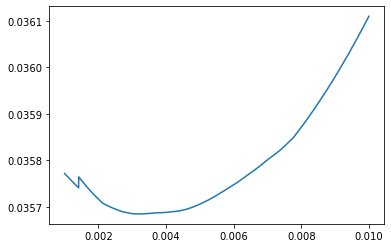

In [119]:
plt.plot(alphalist, err_vec_val);

In [120]:
np.min(err_vec_val) # Lasso kullanarak ulaşabildiğimiz minimum MSE

0.03568515833182114

In [121]:
alphalist[np.argmin(err_vec_val)] # Ulaştığımız minimum hata miktarına denk gelen alpha değeri

0.003210010895543172

In [123]:
from sklearn.metrics import r2_score

In [127]:
alphalist = 10**(np.linspace(-3,-2,1000)) # Daha geniş aralıkta inceleme yapmak için np.linspace() parametrelerini değiştirin
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for index, curr_alpha in enumerate(alphalist):

    # Her bir döngüde ilk olarak Scaling uygula ve sonrasında belirtilen alpha değerinde Lasso'yu çalıştır
    steps = [('standardize', StandardScaler()),
             ('lasso', Lasso(alpha = curr_alpha, tol=0.1))]

    pipe = Pipeline(steps)
    pipe.fit(x4_train.values, y4_train)

    val_set_pred = pipe.predict(x4_val.values)
    err_vec_val[index] = r2_score(y4_val, val_set_pred)

In [128]:
np.max(err_vec_val) # Lasso kullanarak ulaşabildiğimiz maximum R2

0.903524245518886

In [129]:
alphalist[np.argmax(err_vec_val)]

0.003210010895543172

<font color="blue"> Lasso regresyon ile ulaştığımız alpha ve r2 score değerleri bizi doğruya ulaştırmaktan oldukça uzak değerler olduğu için lasso regresyonun yerine lineer regresyonun daha mantıklı.

Best R-score : 0.9002163983146002
Best Alpha : 0.6851322752809226


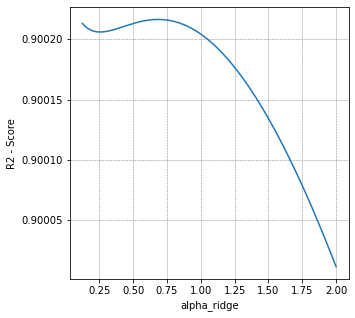

In [135]:
plt.figure(figsize=[5,5])

alpha_list=2**(np.linspace(-3,1,1000))
score_list = []
MSE = np.zeros(len(alpha_list))
for index, alpha_ridge in enumerate(alpha_list):
    ridgeReg = Ridge(alpha=alpha_ridge)
    ridgeReg.fit(x4_train,y4_train)
    pred4_ridge = ridgeReg.predict(x4_val)
    score_list.append( ridgeReg.score(x4_val,y4_val) )
    MSE[index] = mean_squared_error(y4_val, pred4_ridge)

best_alpha = np.argmax(score_list)
plt.plot(alpha_list,score_list)
plt.xticks()
plt.yticks()
# plt.title("TRAFFIC PER DAYS OF THE WEEKDAY",fontweight="bold",fontsize=16)
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.ylabel('R2 - Score')
plt.xlabel("alpha_ridge");

print("Best R-score :",np.max(score_list))
print("Best Alpha :", alpha_list[best_alpha])

<font color="blue"> Şimdi de cross validation ile ortalama r2 kontrolü yapalım.

In [136]:
from sklearn.model_selection import KFold

X, y = X4,y4

X, X_test, y, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Cross-validation index oluşturmasına yardımcı olmak için
X, y = np.array(X), np.array(y)

In [137]:
# Verimizi 5 parçaya ayırmaya deneyelim (n_splits=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validation sonuçlarını toplayacağımız listeler
cv_lm_r2 = []
cv_lm_reg_r2 = []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    # Modellerin oluşturulması
    lm = LinearRegression()
    lm_reg = Ridge(alpha=0.20)

    # Modellerin eğitimi
    lm.fit(X_train, y_train)
    cv_lm_r2.append(lm.score(X_val, y_val))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2.append(lm_reg.score(X_val_scaled, y_val))

# Sonuçların toplanması
print('Simple regression scores: ', cv_lm_r2)
print('Ridge scores: ', cv_lm_reg_r2, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2):.3f} +- {np.std(cv_lm_r2):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2):.3f} +- {np.std(cv_lm_reg_r2):.3f}')

Simple regression scores:  [0.9028599601414219, 0.8787553721103643, 0.8699466765687822, 0.895323132959507, 0.8761173345622354]
Ridge scores:  [0.9029166551148048, 0.8787618262260295, 0.8699442503576464, 0.8953543445054454, 0.876105797716507] 

Simple mean cv r^2: 0.885 +- 0.012
Ridge mean cv r^2: 0.885 +- 0.012


<font color= "blue"> Bütün yatığım analizlere dayanarak, veri setimin darlığından ve featureların dağılımdaki orantısızlıktan olduğunu düşünerek tam olarak istediğim sonuçları elde edememiş olsam da, 4. lineer regresyon modelini laptop fiyatı tahminleme için seçiyorum.

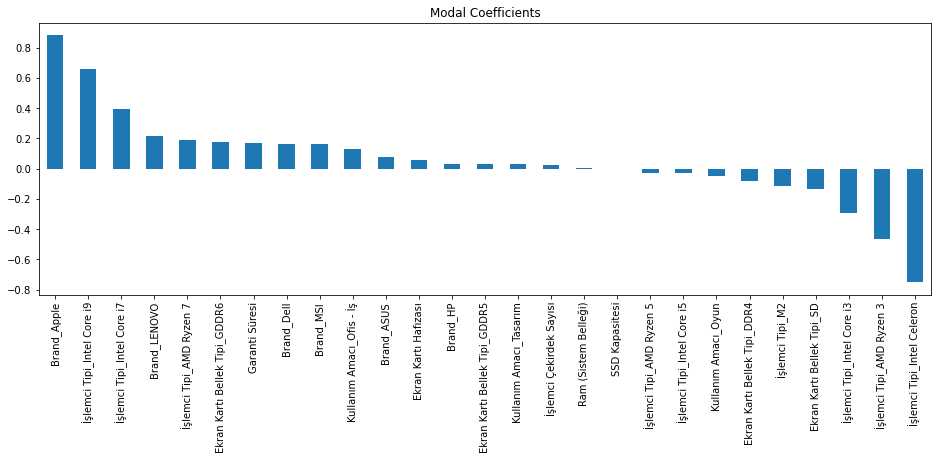

In [158]:
predictors = x4_train.columns
coef = pd.Series(lreg4.coef_,predictors).sort_values(ascending=False)
plt.figure(figsize=[16,5])
coef.plot(kind='bar', title='Modal Coefficients');

In [138]:
 def my_table(val,pred):
    my_dict = {"Actual":[],"Prediction":[],"Error_Per":[],"+/-":[]}
    for i in range(len(val)):
        my_dict["Actual"].append(np.floor(np.exp(val)).iloc[i])
        my_dict["Prediction"].append( round(np.exp(pred)[i]))
        diff = np.exp(pred)[i] - np.exp(val).iloc[i]
        if (diff > 0):
            my_dict["+/-"].append("+")
        elif (0 > diff) :
            my_dict["+/-"].append("-")
        my_dict["Error_Per"].append(round(np.abs(diff)/np.exp(val).iloc[i]*100,2))
    table = pd.DataFrame(my_dict)
    print(mean_error_per(val,pred),", MSE :",np.mean((pred - val)**2))
    return table
def mean_error_per(val,pred):
    total=0
    for i in range(len(val)):
        total = total + (np.abs(np.exp(val).iloc[i] - np.exp(pred)[i])/np.exp(val).iloc[i])*100
    return ("Mean Error Percentage :",total/len(val))

In [143]:
table4 = my_table(y4_val,pred4)
table4

('Mean Error Percentage :', 14.78947928057129) , MSE : 0.036896940723858074


,Actual,Prediction,Error_Per,+/-
0,52353.0,60807,16.15,+
1,94031.0,81602,13.22,-
2,32099.0,28017,12.72,-
3,23447.0,26455,12.82,+
4,37194.0,13548,63.58,-
...,...,...,...,...
419,25699.0,17291,32.72,-
420,16228.0,19351,19.24,+
421,50003.0,58674,17.34,+
422,30283.0,19026,37.17,-


In [145]:
table4.sort_values(by="Error_Per")

,Actual,Prediction,Error_Per,+/-
272,60245.0,60342,0.16,+
254,52499.0,52367,0.25,-
238,30465.0,30556,0.30,+
53,19039.0,19099,0.32,+
346,13314.0,13271,0.33,-
...,...,...,...,...
391,17415.0,26774,53.73,+
345,18772.0,29067,54.84,+
12,12898.0,20245,56.95,+
4,37194.0,13548,63.58,-


In [146]:
table4.Error_Per.describe()

count    424.000000
mean      14.789434
std       12.040867
min        0.160000
25%        5.305000
50%       12.070000
75%       20.207500
max       67.480000
Name: Error_Per, dtype: float64

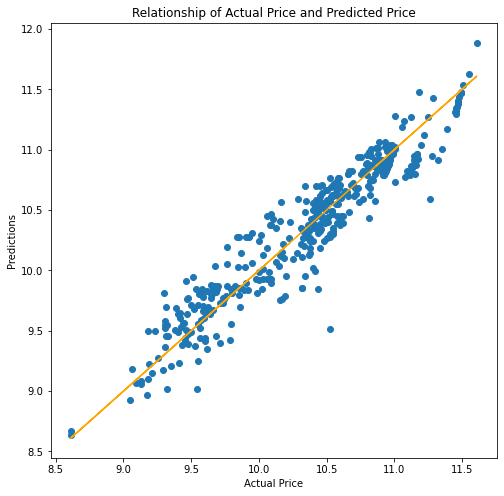

In [150]:
plt.figure(figsize=[8,8]);
plt.scatter(y4_val,lreg4.predict(x4_val));
plt.plot(y4_val,y4_val,"orange");
plt.xlabel("Actual Price");
plt.ylabel("Predictions");
plt.title("Relationship of Actual Price and Predicted Price");

('Mean Error Percentage :', 14.78947928057129) , MSE : 0.036896940723858074


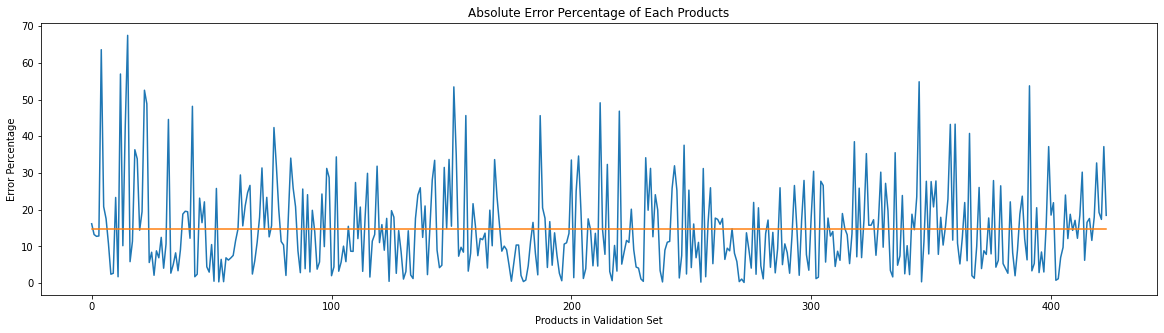

In [156]:
plt.figure(figsize=[20,5]);
plt.plot(my_table(y4_val,pred4).Error_Per);
plt.plot(range(0,424),[14.785]*424);
plt.xlabel("Products in Validation Set");
plt.ylabel("Error Percentage");
plt.title("Absolute Error Percentage of Each Products");
plt.savefig("err.png");